In [1]:
#import libaries
import numpy as np
import skimage 
from skimage import io
from skimage import color
from skimage.transform import resize
from matplotlib import pyplot as plt

In [2]:
# load image
farbig = io.imread(r'C:\Users\Jerome\Desktop\Code\Einführung\127x127.png')

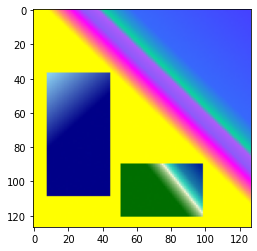

In [3]:
# show image
plt.imshow(farbig)

In [4]:
# grayscale
gray = color.rgb2gray(farbig)

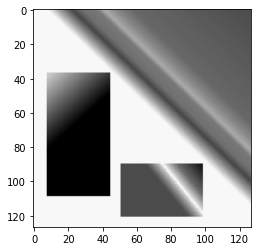

In [5]:
# show grayscale
plt.imshow(gray, cmap = 'gray')

In [6]:
# show 2d array
print(gray)

[[0.92818275 0.9279     0.9279     ... 0.31476235 0.31476235 0.31756784]
 [0.9279     0.9279     0.9279     ... 0.31756784 0.31756784 0.31840118]
 [0.92818275 0.92818275 0.9279     ... 0.31954    0.31756784 0.31559569]
 ...
 [0.92818275 0.9279     0.9279     ... 0.92818275 0.9279     0.9279    ]
 [0.9279     0.92818275 0.9279     ... 0.92818275 0.9279     0.92818275]
 [0.9279     0.9279     0.92818275 ... 0.92818275 0.92818275 0.9279    ]]


In [7]:
# 20 rows, 20 columns → 20x20 px
print(gray.shape)

(127, 127)


In [8]:
# downscale
gray2 = resize(gray, (64,64))

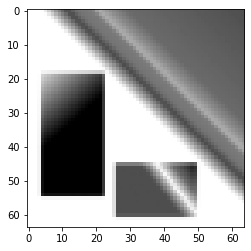

In [9]:
# show downscaled
plt.imshow(gray2, cmap = 'gray')

In [10]:
#farbig = io.imread(r'C:\Users\Jerome\Desktop\Code\Einführung\4x4.png')
# nur versehentlich drin

In [11]:
# use upscaling

In [12]:
#neue alte Größe
rows = 64
columns = 64
newRows = 2* rows - 1
newColumns = 2* columns - 1

In [13]:
#Feld aus lediglich 0
new = np.zeros((newRows,newColumns))
print(new)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# 39 rows, 39 columns → 20x20 px
print(new.shape)

(127, 127)


In [15]:
new[0:newRows : 2, 0:newColumns : 2] = gray2[0:rows, 0:columns]
new2 = new
# :2 = steps of two
print(new)

[[0.9279719  0.         0.92797001 ... 0.31751535 0.         0.31702023]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.92808749 0.         0.92802481 ... 0.32046361 0.         0.31746293]
 ...
 [0.92809656 0.         0.927978   ... 0.92809009 0.         0.92793397]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.92798224 0.         0.92798028 ... 0.92811323 0.         0.92804148]]


In [16]:
# 39 rows, 39 columns → 20x20 px
print(new.shape)

(127, 127)


In [17]:
def bikubische_interpolation(target, roi):
    #loop over all rows
    #horizontal
    newColumns = 0
    roi_x = 0
    roi_y = 0
    newRows = 0
        #selec a line
    for roi_y in range(0, 4):
        #interpolation
        new[newRows +3, newColumns] = (roi[roi_x,roi_y] + roi[roi_x + 1,roi_y ] + roi[roi_x+ 2,roi_y] + roi[roi_x + 3,roi_y]) / 4
        new[newRows +1, newColumns] = (roi[roi_x,roi_y] + roi[roi_x + 1,roi_y ] + roi[roi_x+ 2,roi_y] + roi[roi_x + 3,roi_y]) * 2/7
        new[newRows+5, newColumns] = (roi[roi_x,roi_y] + roi[roi_x + 1,roi_y ] + roi[roi_x+ 2,roi_y] + roi[roi_x + 3,roi_y]) * 6/7
        newRows = newRows + 2

    newColumns = 0
    roi_x = 0
    roi_y = 0
    newRows = 0
    #selec a line
    for roi_x in range(0, 4):
        #interpolation
        new[newRows, newColumns+3] = (roi[roi_x,roi_y] + roi[roi_x ,roi_y + 1 ] + roi[roi_x,roi_y + 2] + roi[roi_x,roi_y + 3]) / 4
        new[newRows, newColumns+1] = (roi[roi_x,roi_y] + roi[roi_x ,roi_y + 1 ] + roi[roi_x,roi_y + 2] + roi[roi_x,roi_y + 3]) * 2/7
        new[newRows, newColumns +5] = (roi[roi_x,roi_y] + roi[roi_x ,roi_y + 1 ] + roi[roi_x,roi_y + 2] + roi[roi_x,roi_y + 3]) * 6/7
        newColumns = newColumns + 2
            
        # function
    return new

In [18]:
def upscale(img, scale):
    # To Do
    # use scale
    rows = len(img[1])
    columns = len(gray2[2])
    newRows = rows * scale - 1
    newColumns =columns * scale - 1
    new = np.zeros((newRows,newColumns))
    # new picture
    new[0:newRows : 2, 0:newColumns : 2] = gray2[0:rows, 0:columns]
    # loop over all pixel
        # horizontal
    for rows in range(0, 60,4):
        for y in range(0,60, 4):
            # select region of interest 4 * 4
            roi_x = 4
            roi_y = 4
            roi = np.zeros((roi_x,roi_y))
            roi[0, 0] = gray2[rows, y]
            roi[0, 1] = gray2[rows, y + 1]
            roi[0, 2] = gray2[rows, y + 2]
            roi[0, 3] = gray2[rows, y + 3]
            
            roi[ 1, 0] = gray2[rows + 1, y]
            roi[ 1, 1] = gray2[rows + 1, y + 1]
            roi[ 1, 2] = gray2[rows + 1, y + 2]
            roi[ 1, 3] = gray2[rows + 1, y + 3]
              
            roi[ 2, 0] = gray2[rows + 2, y]
            roi[ 2, 1] = gray2[rows + 2, y + 1]
            roi[ 2, 2] = gray2[rows + 2, y + 2]
            roi[ 2, 3] = gray2[rows + 2, y + 3]
            
            roi[ 3, 0] = gray2[rows + 3, y]
            roi[ 3, 1] = gray2[rows + 3, y+ 1]
            roi[ 3, 2] = gray2[rows + 3, y+ 2]
            roi[ 3, 3] = gray2[rows + 3, y+ 3]
            
            # bicubische interpolation
            upscaledimage = bikubische_interpolation(img, roi)
            return upscaledimage

In [19]:
#use upscaling
upscaledimage = upscale(gray2, 2)

In [20]:
#show new
print(upscaledimage)

[[0.9279719  1.06061617 0.92797001 ... 0.31751535 0.         0.31702023]
 [1.06062647 0.         0.         ... 0.         0.         0.        ]
 [0.92808749 0.         0.92802481 ... 0.32046361 0.         0.31746293]
 ...
 [0.92809656 0.         0.927978   ... 0.92809009 0.         0.92793397]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.92798224 0.         0.92798028 ... 0.92811323 0.         0.92804148]]


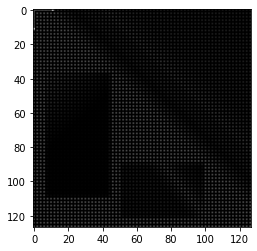

In [21]:
plt.imshow(upscaledimage, cmap = 'gray')

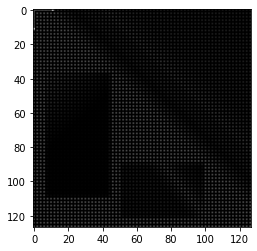

In [22]:
plt.imshow(new2, cmap = 'gray')

In [23]:
print(new2)

[[0.9279719  1.06061617 0.92797001 ... 0.31751535 0.         0.31702023]
 [1.06062647 0.         0.         ... 0.         0.         0.        ]
 [0.92808749 0.         0.92802481 ... 0.32046361 0.         0.31746293]
 ...
 [0.92809656 0.         0.927978   ... 0.92809009 0.         0.92793397]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.92798224 0.         0.92798028 ... 0.92811323 0.         0.92804148]]


In [24]:
# das ist die Änderung